Datenvorschau:


,iteration,signal,kill_ts_ms,down_ts_ms,up_ts_ms,downtime_from_kill_ms,downtime_from_down_ms,kill_dt,up_dt
0,1,SIGTERM,1760366810424,1760366810456,1760366810745,321,289,2025-10-13 14:46:50.424,2025-10-13 14:46:50.745
1,2,SIGTERM,1760366812748,1760366812790,1760366813113,365,323,2025-10-13 14:46:52.748,2025-10-13 14:46:53.113
2,3,SIGTERM,1760366815117,1760366815163,1760366815492,375,329,2025-10-13 14:46:55.117,2025-10-13 14:46:55.492
3,4,SIGTERM,1760366817493,1760366817531,1760366817839,346,308,2025-10-13 14:46:57.493,2025-10-13 14:46:57.839
4,5,SIGTERM,1760366819844,1760366819878,1760366820164,320,286,2025-10-13 14:46:59.844,2025-10-13 14:47:00.164


downtime_from_kill_ms                             \
                         mean        std  min  max count   
signal                                                     
SIGKILL                374.99  17.228995  335  418   100   
SIGTERM                354.52  18.079778  315  417   100   

        downtime_from_down_ms                             
                         mean        std  min  max count  
signal                                                    
SIGKILL                162.81   8.111216  148  210   100  
SIGTERM                307.79  15.771279  277  361   100

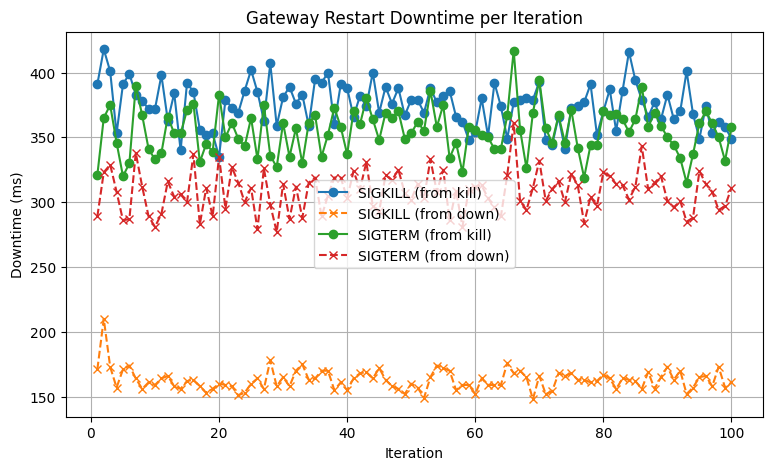

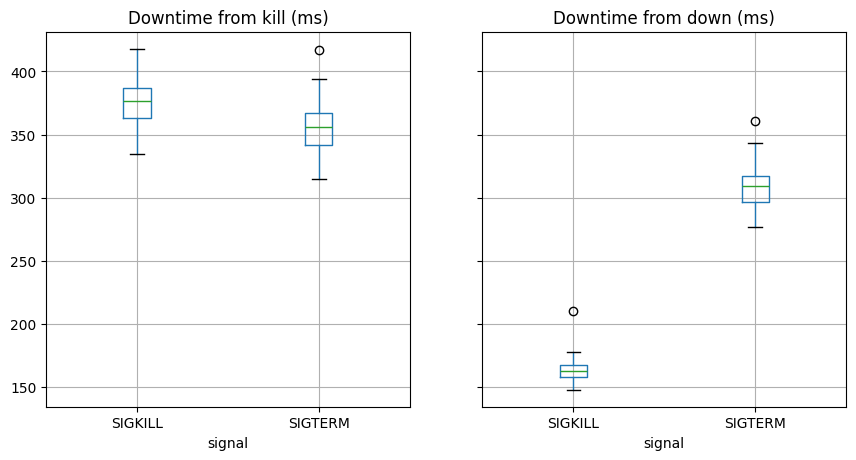

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load results ===
df = pd.read_csv("./measurements.csv")

# === Convert timestamps for readability ===
df["kill_dt"] = pd.to_datetime(df["kill_ts_ms"], unit="ms")
df["up_dt"] = pd.to_datetime(df["up_ts_ms"], unit="ms")

print("Datenvorschau:")
display(df.head())

# === Summary statistics ===
summary = (
    df.groupby("signal")[["downtime_from_kill_ms", "downtime_from_down_ms"]]
    .agg(["mean", "std", "min", "max", "count"])
)
display(summary)

# === Visualization: downtime over iterations ===
plt.figure(figsize=(9, 5))
for sig, group in df.groupby("signal"):
    plt.plot(group["iteration"], group["downtime_from_kill_ms"], "o-", label=f"{sig} (from kill)")
    plt.plot(group["iteration"], group["downtime_from_down_ms"], "x--", label=f"{sig} (from down)")
plt.title("Gateway Restart Downtime per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Downtime (ms)")
plt.legend()
plt.grid(True)
plt.show()

# === Boxplots for comparison ===
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
df.boxplot(column="downtime_from_kill_ms", by="signal", ax=axes[0])
axes[0].set_title("Downtime from kill (ms)")
df.boxplot(column="downtime_from_down_ms", by="signal", ax=axes[1])
axes[1].set_title("Downtime from down (ms)")
plt.suptitle("")
plt.show()